In [1]:
import mlrose
import time
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fourpeaks(length, algo):

    ones_fit = mlrose.FourPeaks()
    prob_fit = mlrose.DiscreteOpt(length=length, fitness_fn = ones_fit, maximize=True, max_val=2)
    
    if algo == 'rhc':
        start_time = time.time()
        best_state, best_fitness = mlrose.random_hill_climb(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'sa':
        start_time = time.time()
        best_state, best_fitness = mlrose.simulated_annealing(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'ga':
        start_time = time.time()
        best_state, best_fitness = mlrose.genetic_alg(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    else:
        start_time = time.time()
        best_state, best_fitness = mlrose.mimic(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    return best_fitness, end_time

In [3]:
def kcolor(length, algo, edges):
    ones_fit = mlrose.MaxKColor(edges=edges)
    prob_fit = mlrose.DiscreteOpt(length=length, fitness_fn = ones_fit, maximize=False)
    
    if algo == 'rhc':
        start_time = time.time()
        best_state, best_fitness = mlrose.random_hill_climb(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'sa':
        start_time = time.time()
        best_state, best_fitness = mlrose.simulated_annealing(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'ga':
        start_time = time.time()
        best_state, best_fitness = mlrose.genetic_alg(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    else:
        start_time = time.time()
        best_state, best_fitness = mlrose.mimic(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    return best_fitness, end_time

In [4]:
def flipflop(length, algo):

    ff_fit = mlrose.OneMax()
    prob_fit = mlrose.DiscreteOpt(length=length, fitness_fn = ff_fit, maximize=True, max_val=2)
    
    if algo == 'rhc':
        start_time = time.time()
        best_state, best_fitness = mlrose.random_hill_climb(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'sa':
        start_time = time.time()
        best_state, best_fitness = mlrose.simulated_annealing(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    elif algo == 'ga':
        start_time = time.time()
        best_state, best_fitness = mlrose.genetic_alg(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    else:
        start_time = time.time()
        best_state, best_fitness = mlrose.mimic(prob_fit, max_iters = 100000)
        end_time = time.time() - start_time
    return best_fitness, end_time

In [13]:
def createNewEdge():
    return (random.randint(1,20), random.randint(1,20))

def runprob(prob):
    best_fitness_dict = {}
    for alg in ['rhc', 'sa', 'ga', 'mimic']:
        best_fitness_array = []
        times = []
        print(alg)
        for i in range(30, 101):
            if prob == 'ff':
                best_fitness, time = flipflop(i, alg)
                best_fitness_array.append(best_fitness)
                times.append(time)
            elif prob == 'fp':
                best_fitness, time = fourpeaks(i, alg)
                best_fitness_array.append(best_fitness)
                times.append(time)
            elif prob == 'kc':
                edge_list = []
                while len(edge_list) < i:
                    new_coord = createNewEdge()
                    if new_coord not in edge_list:
                        edge_list.append(new_coord)
                best_fitness, time = kcolor(i, alg, edge_list)
                best_fitness_array.append(best_fitness)
                times.append(time)


        best_fitness_dict[alg] = {'fitness': best_fitness_array, 'times': times}
    return best_fitness_dict


In [14]:
def plot_fitness(results):
    x = list(range(30,101))
    plt.plot(x, results['rhc']['fitness'], color='red', label='rhc')
    plt.plot(x, results['sa']['fitness'], color='green', label='sa')
    plt.plot(x, results['ga']['fitness'], color='blue', label='ga')
    plt.plot(x, results['mimic']['fitness'], color='orange', label='mimic')
    plt.xlabel('bit size')
    plt.ylabel('fitness')
    plt.legend(loc="best")
    plt.show()

def plot_times(results):
    x = list(range(30, 101))
    plt.plot(x, results['rhc']['times'], color='red', label='rhc')
    plt.plot(x, results['sa']['times'], color='green', label='sa')
    plt.plot(x, results['ga']['times'], color='blue', label='ga')
    plt.plot(x, results['mimic']['times'], color='orange', label='mimic')
    plt.xlabel('bit size')
    plt.ylabel('run time')
    plt.legend(loc="best")
    plt.show()

In [11]:
results_ff = runprob('ff')
plot_fitness(results_ff)
plot_times(results_ff)

rhc
sa
ga


KeyboardInterrupt: 

In [ ]:
results_fp = runprob('fp')
plot_fitness(results_fp)
plot_times(results_fp)

In [15]:
results_kc = runprob('kc')
plot_fitness(results_kc)
plot_times(results_kc)

rhc
sa


KeyboardInterrupt: 

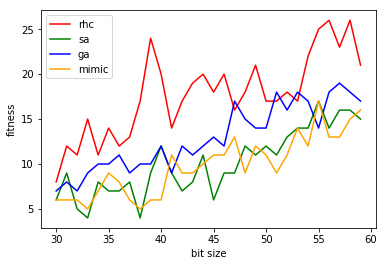

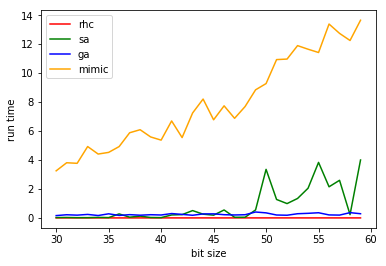

Fitting neural network

In [7]:
import mlrose
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.datasets import load_iris
np.random.seed(3)
    
# Load the Iris dataset
data = pd.read_csv('wineQuality.csv')

data.head()
data.drop('quality', axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [13]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:, -1])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
def nnRO(iters, algo, X_train, X_test, y_train, y_test):
    
    if algo == 'simulated_annealing':
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = iters, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100)
    elif algo == 'genetic_alg':
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = iters, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100, pop_size = 100, mutation_prob = 0.2)
    else:
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = iters, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100, schedule = mlrose.GeomDecay(init_temp = 5))
    
    start_time_train = time.time()
    nn_model1.fit(X_train, y_train)
    end_time_train = time.time() - start_time_train
    
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training accuracy: ', y_train_accuracy)
    
    # Predict labels for test set and assess accuracy
    start_time_pred = time.time()
    y_test_pred = nn_model1.predict(X_test)
    end_time_pred = time.time() - start_time_pred
    
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Test accuracy: ', y_test_accuracy)
    
    return y_train_accuracy, y_test_accuracy, end_time_train, end_time_pred
    
    
    

In [24]:
nn_dict = {'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': []}
for alg in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    print(alg)
    y_train_arr = []
    y_test_arr = []
    train_times = []
    test_times = []
    for itera in [100, 200, 500, 1000, 2000, 5000]:
        y_train_acc, y_test_acc, train_time, test_time = nnRO(itera, alg, X_train_scaled, X_test_scaled, y_train, y_test)
        y_train_arr.append(y_train_acc)
        y_test_arr.append(y_test_acc)
        train_times.append(train_time)
        test_times.append(test_time)
    nn_dict[alg] = {'train_acc': y_train_arr, 'test_acc': y_test_arr, 'train_times': train_times, 'test_times': test_times}
print(nn_dict)

random_hill_climb
Training accuracy:  0.6578179696616102
Test accuracy:  0.6673469387755102
Training accuracy:  0.6621936989498249
Test accuracy:  0.6727891156462585
Training accuracy:  0.676779463243874
Test accuracy:  0.6802721088435374
Training accuracy:  0.6998249708284714
Test accuracy:  0.6959183673469388
Training accuracy:  0.751458576429405
Test accuracy:  0.736734693877551
Training accuracy:  0.7596266044340724
Test accuracy:  0.7448979591836735
simulated_annealing
Training accuracy:  0.3372228704784131
Test accuracy:  0.3272108843537415
Training accuracy:  0.338681446907818
Test accuracy:  0.33129251700680273
Training accuracy:  0.6621936989498249
Test accuracy:  0.672108843537415
Training accuracy:  0.6721120186697783
Test accuracy:  0.6782312925170068
Training accuracy:  0.7254959159859977
Test accuracy:  0.7292517006802721
Training accuracy:  0.7599183197199533
Test accuracy:  0.746938775510204
genetic_alg
Training accuracy:  0.6648191365227538
Test accuracy:  0.6727891156

In [56]:
print(nn_dict)

{'random_hill_climb': {'train_acc': array([1, 1, 1, ..., 1, 1, 0], dtype=int64), 'test_acc': array([0, 1, 1, ..., 0, 0, 1], dtype=int64), 'train_times': [0.25377392768859863, 0.4160640239715576, 1.061410903930664, 1.9816317558288574, 3.8401644229888916, 6.10878586769104], 'test_times': [0.0009975433349609375, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'simulated_annealing': [], 'genetic_alg': []}


In [25]:
nn_dict

{'genetic_alg': {'test_acc': [0.6727891156462585,
   0.7095238095238096,
   0.672108843537415,
   0.6959183673469388,
   0.6952380952380952,
   0.6863945578231293],
  'test_times': [0.0,
   0.0,
   0.0010085105895996094,
   0.0,
   0.0009999275207519531,
   0.00099945068359375],
  'train_acc': [0.6648191365227538,
   0.705075845974329,
   0.6621936989498249,
   0.6872812135355892,
   0.7007001166861143,
   0.6899066511085181],
  'train_times': [7.964967727661133,
   15.07384181022644,
   37.94348216056824,
   74.60743737220764,
   148.20977973937988,
   371.15404510498047]},
 'random_hill_climb': {'test_acc': [0.6673469387755102,
   0.6727891156462585,
   0.6802721088435374,
   0.6959183673469388,
   0.736734693877551,
   0.7448979591836735],
  'test_times': [0.0,
   0.0009980201721191406,
   0.0,
   0.0009975433349609375,
   0.0,
   0.0009961128234863281],
  'train_acc': [0.6578179696616102,
   0.6621936989498249,
   0.676779463243874,
   0.6998249708284714,
   0.751458576429405,
   0

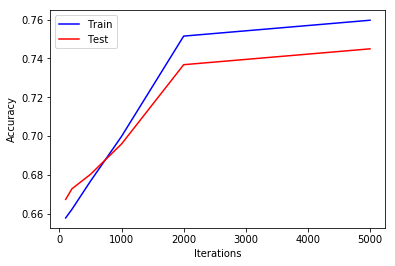

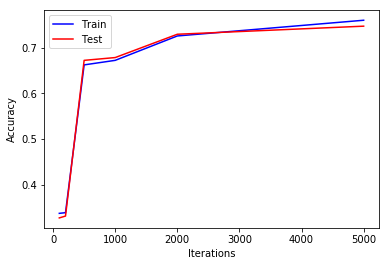

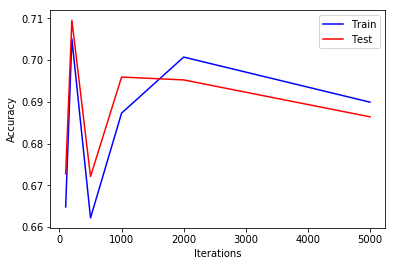

In [26]:
iterations = [100, 200, 500, 1000, 2000, 5000]
for alg in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    plt.figure()
    plt.plot(iterations, nn_dict[alg]['train_acc'], 'blue', label='Train')
    plt.plot(iterations, nn_dict[alg]['test_acc'], color='red', label='Test')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

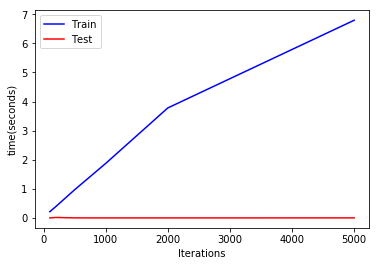

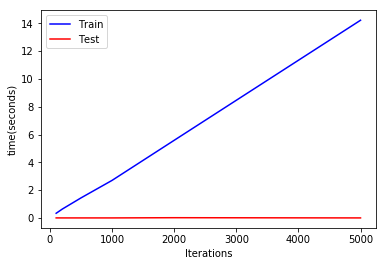

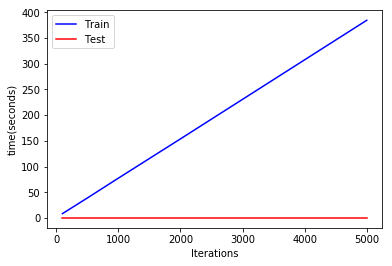

In [77]:
for alg in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    plt.figure()
    plt.plot(iterations, nn_dict[alg]['train_times'], 'blue', label='Train')
    plt.plot(iterations, nn_dict[alg]['test_times'], color='red', label='Test')
    plt.xlabel('Iterations')
    plt.ylabel('time(seconds)')
    plt.legend(loc='best')

Trying out different values of temp parameter

In [27]:
def nnRO_2(max_temp, mutation_prob, algo, X_train, X_test, y_train, y_test):
    
    if algo == 'simulated_annealing':
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100, schedule = mlrose.GeomDecay(init_temp = max_temp))
    elif algo == 'genetic_alg':
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100, pop_size = 100, mutation_prob = mutation_prob)
    else:
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'relu', algorithm = algo,
                                max_iters = 5000, bias = True, is_classifier = True, learning_rate = 0.1,
                                early_stopping=True, clip_max=5, max_attempts=100, )
    
    start_time_train = time.time()
    nn_model1.fit(X_train, y_train)
    end_time_train = time.time() - start_time_train
    
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training accuracy: ', y_train_accuracy)
    
    # Predict labels for test set and assess accuracy
    start_time_pred = time.time()
    y_test_pred = nn_model1.predict(X_test)
    end_time_pred = time.time() - start_time_pred
    
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print('Test accuracy: ', y_test_accuracy)
    
    return y_train_accuracy, y_test_accuracy, end_time_train, end_time_pred
    

In [29]:
y_train_sa = []
y_test_sa = []
train_times_sa = [] 
test_times_sa = []
for max_temp in [2,3,5,10,15, 20, 50, 100]:
    y_train_acc, y_test_acc, train_time, test_time = nnRO_2(max_temp,10, 'simulated_annealing', X_train_scaled, X_test_scaled, y_train, y_test)
    y_train_sa.append(y_train_acc)
    y_test_sa.append(y_test_acc)
    train_times_sa.append(train_time)
    test_times_sa.append(test_time)

Training accuracy:  0.7397899649941657
Test accuracy:  0.736734693877551
Training accuracy:  0.7214119019836639
Test accuracy:  0.7163265306122449


KeyboardInterrupt: 

In [ ]:
temps = [2,3,5,10,15, 20, 50, 100]
plt.figure()
plt.plot(temps, y_train_sa, color='blue', label='train')
plt.plot(temps, y_test_sa, color='red', label='test')
plt.xlabel("Max temp")
plt.ylabel('Accuracy')
    

In [40]:
y_train_ga = []
y_test_ga = []
train_times_ga = [] 
test_times_ga = []
for mutation in [.1, .2, .3, .4, .5]:
    print(mutation)
    y_train_acc, y_test_acc, train_time, test_time = nnRO_2(1, mutation, 'genetic_alg',  X_train_scaled, X_test_scaled, y_train, y_test)
    y_train_ga.append(y_train_acc)
    y_test_ga.append(y_test_acc)
    train_times_ga.append(train_time)
    test_times_ga.append(test_time)
    
mutation = [.1, .2, .3, .4, .5]
plt.figure()
plt.plot(mutation, y_train_ga, color='blue', label='train')
plt.plot(mutation, y_test_ga, color='red', label='test')
plt.xlabel("Max temp")
plt.ylabel('Accuracy')

0.1


KeyboardInterrupt: 

Text(0.5,1,'RO Training Accuracies')

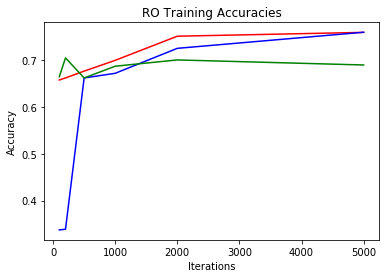

In [37]:
iterations = [100, 200, 500, 1000, 2000, 5000]
plt.figure()
plt.plot(iterations, nn_dict['random_hill_climb']['train_acc'], color='red', label='RHC')
plt.plot(iterations, nn_dict['simulated_annealing']['train_acc'], color='blue', label='SA')
plt.plot(iterations, nn_dict['genetic_alg']['train_acc'], color='green', label='GA')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('RO Training Accuracies')

Text(0.5,1,'RO Testing Accuracies')

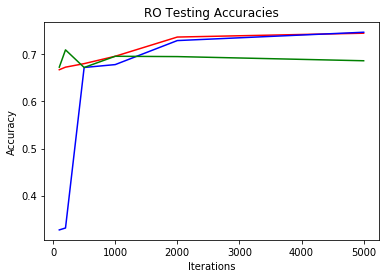

In [38]:
iterations = [100, 200, 500, 1000, 2000, 5000]
plt.figure()
plt.plot(iterations, nn_dict['random_hill_climb']['test_acc'], color='red', label='RHC')
plt.plot(iterations, nn_dict['simulated_annealing']['test_acc'], color='blue', label='SA')
plt.plot(iterations, nn_dict['genetic_alg']['test_acc'], color='green', label='GA')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('RO Testing Accuracies')

Text(0,0.5,'Accuracy')

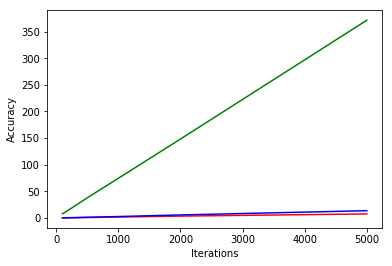

In [34]:
iterations = [100, 200, 500, 1000, 2000, 5000]
plt.figure()
plt.plot(iterations, nn_dict['random_hill_climb']['train_times'], color='red', label='RHC')
plt.plot(iterations, nn_dict['simulated_annealing']['train_times'], color='blue', label='SA')
plt.plot(iterations, nn_dict['genetic_alg']['train_times'], color='green', label='GA')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')